# Potential flow: Elementary solutions

Philipp Schlatter, LSTM/FAU 2025

Colab: https://colab.research.google.com/github/pschlatt1/notebooks/blob/main/potential_flow.ipynb

### Preliminaries

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  # for Google Colab and interative figures
  !pip install -q ipympl ipython ipywidgets
  from google.colab import output
  output.enable_custom_widget_manager()

In [2]:
import math as mt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

### Create a mesh

In [3]:
class Cartesian:
    def __init__(self,N,x_start,x_end,y_start,y_end):
        self.X, self.Y = np.meshgrid(np.linspace(x_start, x_end, N), np.linspace(y_start, y_end, N))
        self.type = "Cartesian"

class Polar:
    def __init__(self,N,r_start,r_end):
        xx,yy = np.meshgrid(np.linspace(r_start,r_end,N),np.linspace(0,2*mt.pi,N,endpoint=True))
        self.X, self.Y = xx*np.cos(yy),xx*np.sin(yy)
        self.type = "Polar"

class Velocity:
    def __init__(self,mesh):
        self.u = mesh.X*0
        self.v = mesh.X*0
        self.p = mesh.X*0

    def comp_p(self,u_ref):
        self.p = 2*(0.5*u_ref**2-0.5*(self.u**2 + self.v**2))

In [4]:
# create a mesh
#mesh = Polar(100,0.1,10)
mesh = Cartesian(100,-10,10,-10,10)

### Define the elementary solutions

In [5]:
class Dipole:
    # strength M
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y

    def vel(self, mesh):
        u = (-self.strength / (2 * mt.pi) *
             ((mesh.X - self.x)**2 - (mesh.Y - self.y)**2) /
             ((mesh.X - self.x)**2 + (mesh.Y - self.y)**2)**2)
        v = (-self.strength / (2 * mt.pi) *
             2 * (mesh.X - self.x) * (mesh.Y - self.y) /
             ((mesh.X - self.x)**2 + (mesh.Y - self.y)**2)**2)
        return u, v

    def psi(self, mesh):
        psi = -(self.strength / (2 * mt.pi) *
               (mesh.Y - self.y) / ((mesh.X - self.x)**2 + (mesh.Y - self.y)**2))
        return psi

    def phi(self, mesh):
        phi = (self.strength / (2 * mt.pi) *
               (mesh.X - self.x) / ((mesh.X - self.x)**2 + (mesh.Y - self.y)**2))
        return phi

In [6]:
class Vortex:
    def __init__(self, strength, x, y):
        self.strength = strength  # Gamma
        self.x, self.y = x, y

    def vel(self, mesh):
        u = -self.strength / (2 * mt.pi) * (mesh.Y - self.y) / ((mesh.X - self.x)**2 + (mesh.Y - self.y)**2)
        v = +self.strength / (2 * mt.pi) * (mesh.X - self.x) / ((mesh.X - self.x)**2 + (mesh.Y - self.y)**2)
        return u, v

    def psi(self, mesh):
        psi =  -self.strength / ( 4*mt.pi) * np.log((mesh.X - self.x)**2 + (mesh.Y - self.y)**2)
        return psi

    def phi(self, mesh):
        phi = self.strength / (2 * mt.pi) * np.arctan2((mesh.Y - self.y), (mesh.X - self.x))
        return phi

In [7]:
class Source:
    def __init__(self, strength, x, y):
        self.strength = strength  # Q
        self.x, self.y = x, y

    def vel(self, mesh):
        u = (self.strength / (2 * mt.pi) * (mesh.X - self.x) / ((mesh.X - self.x)**2 + (mesh.Y - self.y)**2))
        v = (self.strength / (2 * mt.pi) * (mesh.Y - self.y) / ((mesh.X - self.x)**2 + (mesh.Y - self.y)**2))
        return u, v

    def psi(self, mesh):
        psi = (self.strength / (2 * mt.pi) * np.arctan2((mesh.Y - self.y), (mesh.X - self.x)))
        return psi

    def phi(self, mesh):
        phi =  self.strength / (4* mt.pi) * np.log((mesh.X - self.x)**2 + (mesh.Y - self.y)**2)
        return phi

In [8]:
class Freestream:
    def __init__(self, strength, alpha):
        self.strength = strength
        self.alpha = alpha

    def vel(self, mesh):
        u = mesh.X*0 + self.strength*np.cos(self.alpha)
        v = mesh.X*0 + self.strength*np.sin(self.alpha)
        return u, v

    def phi(self, mesh):   # potential
        phi = self.strength*(mesh.X*np.cos(self.alpha) + mesh.Y*np.sin(self.alpha))
        return phi

    def psi(self, mesh):   # stream function
        psi = self.strength*(-mesh.X*np.sin(self.alpha) + mesh.Y*np.cos(self.alpha))
        return psi

In [9]:
class Stagnation:
    def __init__(self, strength):
        self.strength = strength

    def vel(self, mesh):
        u = mesh.X*0 + self.strength*2*mesh.X
        v = mesh.X*0 - self.strength*2*mesh.Y
        return u, v

    def phi(self, mesh):   # potential
        phi = self.strength*(mesh.X**2- mesh.Y**2)
        return phi

    def psi(self, mesh):   # stream function
        psi = self.strength*2*mesh.X*mesh.Y
        return psi

### Plot the elementary solutions

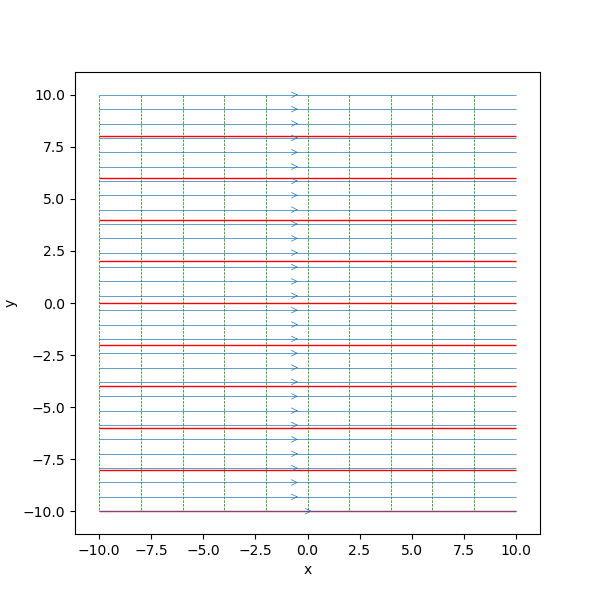

In [10]:
fst = Freestream(strength=1,alpha=0.0)
u, v = fst.vel(mesh)
psi = fst.psi(mesh)
phi = fst.phi(mesh)

plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.contour(mesh.X, mesh.Y, psi, levels=np.arange(-20,20,2),linewidths=1,linestyles='-',colors='r')
plt.contour(mesh.X, mesh.Y, phi, levels=np.arange(-20,20,2),linewidths=0.5,linestyles='--',colors='g')

plt.streamplot(mesh.X, mesh.Y, u, v, density=1, linewidth=0.5, arrowsize=1, arrowstyle='->')

#plt.colorbar()
plt.show()

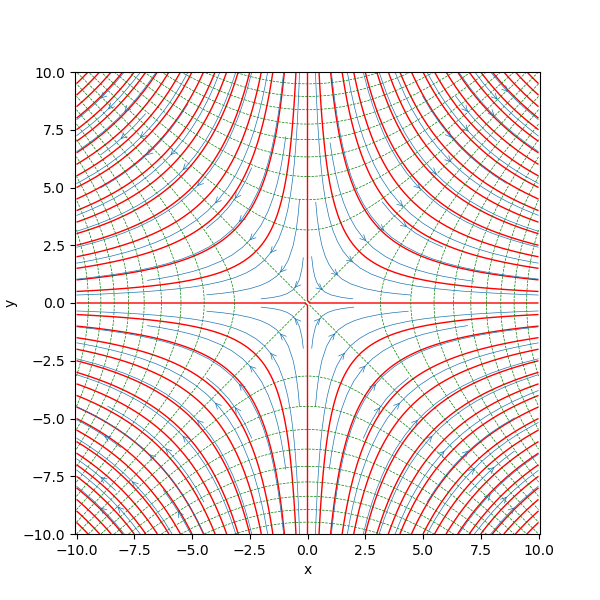

In [11]:
src = Stagnation(strength=1)
u, v = src.vel(mesh)
psi = src.psi(mesh)
phi = src.phi(mesh)

plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.contour(mesh.X, mesh.Y, psi, levels=np.arange(-200,200,10),linewidths=1,linestyles='-',colors='r')
plt.contour(mesh.X, mesh.Y, phi, levels=np.arange(-200,200,10),linewidths=0.5,linestyles='--',colors='g')

plt.streamplot(mesh.X, mesh.Y, u, v, density=1, linewidth=0.5, arrowsize=1, arrowstyle='->')

#plt.colorbar()
plt.show()

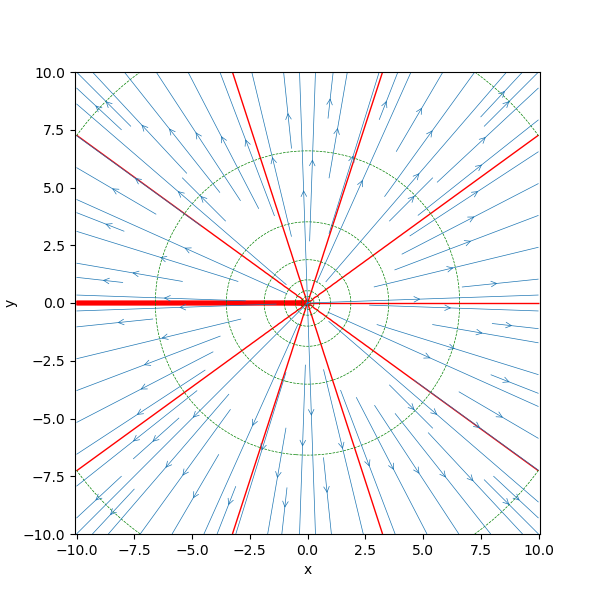

In [12]:
src = Source(strength=1,x=0,y=0)
u, v = src.vel(mesh)
psi = src.psi(mesh)
phi = src.phi(mesh)

plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.contour(mesh.X, mesh.Y, psi, levels=np.arange(-20,20,0.1),linewidths=1,linestyles='-',colors='r')
plt.contour(mesh.X, mesh.Y, phi, levels=np.arange(-20,20,0.1),linewidths=0.5,linestyles='--',colors='g')

plt.streamplot(mesh.X, mesh.Y, u, v, density=1, linewidth=0.5, arrowsize=1, arrowstyle='->')

#plt.colorbar()
plt.show()

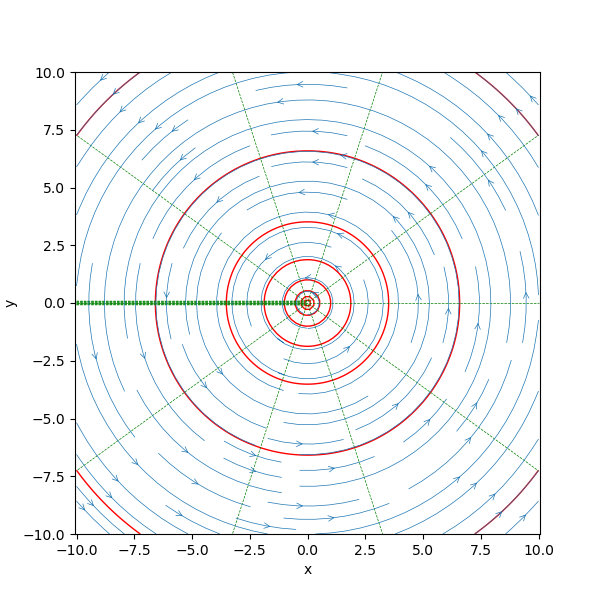

In [13]:
src = Vortex(strength=1,x=0,y=0)
u, v = src.vel(mesh)
psi = src.psi(mesh)
phi = src.phi(mesh)

plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.contour(mesh.X, mesh.Y, psi, levels=np.arange(-20,20,0.1),linewidths=1,linestyles='-',colors='r')
plt.contour(mesh.X, mesh.Y, phi, levels=np.arange(-20,20,0.1),linewidths=0.5,linestyles='--',colors='g')

plt.streamplot(mesh.X, mesh.Y, u, v, density=1, linewidth=0.5, arrowsize=1, arrowstyle='->')

#plt.colorbar()
plt.show()

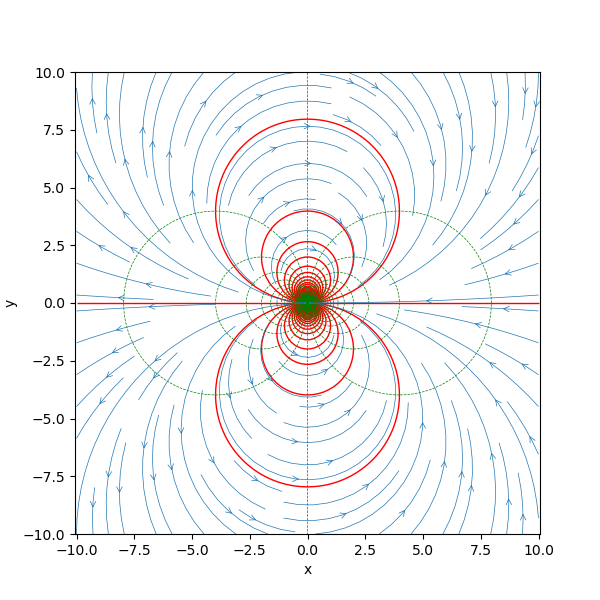

In [14]:
doublet = Dipole(strength=1, x=0,y=0)
u, v = doublet.vel(mesh)
psi = doublet.psi(mesh)
phi = doublet.phi(mesh)

plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.contour(mesh.X, mesh.Y, psi, levels=np.arange(-20,20,0.02),linewidths=1,linestyles='-',colors='r')
plt.contour(mesh.X, mesh.Y, phi, levels=np.arange(-20,20,0.02),linewidths=0.5,linestyles='--',colors='g')

plt.streamplot(mesh.X, mesh.Y, u, v, density=1, linewidth=0.5, arrowsize=1, arrowstyle='->')

#plt.colorbar()
plt.show()

Recreate a dipole by the sum of a source and a sink, with strenght $\lambda = 2 a Q$ with $\pm a$ being the positions and $\pm Q$ the strength.

In [15]:
# Construct a diploe

Gamma = 1/4
vortex = Source(strength=Gamma, x=-2,y=0)
u1, v1 = vortex.vel(mesh)
psi1 = vortex.psi(mesh)
phi1 = vortex.phi(mesh)

vortex = Source(strength=-Gamma, x=2,y=0)
u2, v2 = vortex.vel(mesh)
psi2 = vortex.psi(mesh)
phi2 = vortex.phi(mesh)

U = Velocity(mesh)
U.u = u1+u2
U.v = v1+v2
psi = psi1+psi2
phi = phi1+phi2


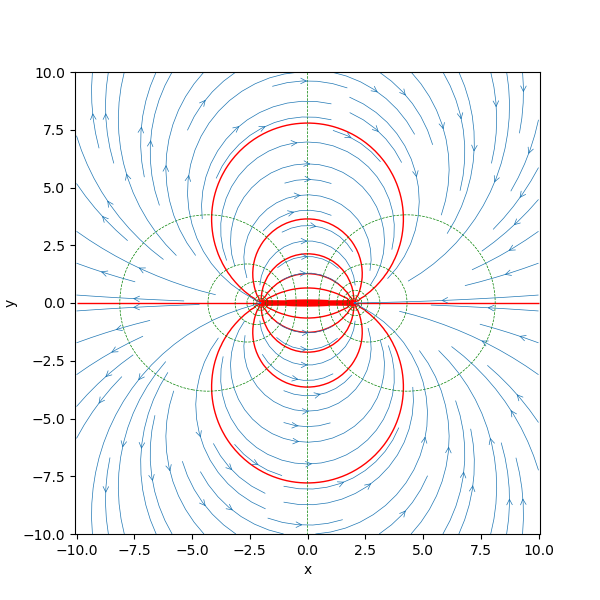

In [16]:
plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.contour(mesh.X, mesh.Y, psi, levels=np.arange(-20,20,0.02),linewidths=1,linestyles='-',colors='r')
plt.contour(mesh.X, mesh.Y, phi, levels=np.arange(-20,20,0.02),linewidths=0.5,linestyles='--',colors='g')

plt.streamplot(mesh.X, mesh.Y, U.u, U.v, density=1, linewidth=0.5, arrowsize=1, arrowstyle='->')

#plt.colorbar()
plt.show()

### Plot the uniform flow and a source at the origin

In [17]:
# Flow around a source
fst = Freestream(strength=1,alpha=0)
u1,v1 = fst.vel(mesh)
psi1 = fst.psi(mesh)
phi1 = fst.phi(mesh)

dip = Source(strength=10, x=0, y=0)
u2, v2 = dip.vel(mesh)
psi2 = dip.psi(mesh)
phi2 = dip.phi(mesh)

vortex = Vortex(strength=0, x=0,y=0)
u3, v3 = vortex.vel(mesh)
psi3 = vortex.psi(mesh)
phi3 = vortex.phi(mesh)


U = Velocity(mesh)
U.u = u1+u2+u3
U.v = v1+v2+v3
psi = psi1+psi2+psi3
phi = phi1+phi2+phi3

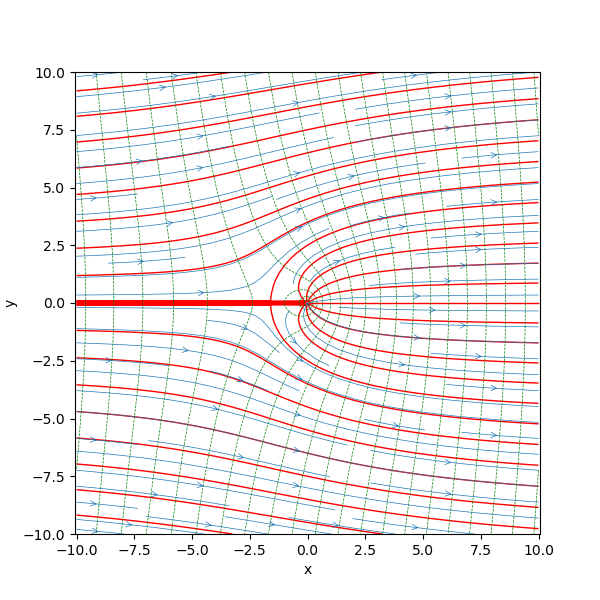

In [18]:
plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.contour(mesh.X, mesh.Y, psi, levels=np.arange(-20,20,1),linewidths=1,linestyles='-',colors='r')
plt.contour(mesh.X, mesh.Y, phi, levels=np.arange(-20,20,1),linewidths=0.5,linestyles='--',colors='g')

plt.streamplot(mesh.X, mesh.Y, U.u, U.v, density=1, linewidth=0.5, arrowsize=1, arrowstyle='->')

#plt.colorbar()
plt.show()

### Plot the flow around a cylinder

In [23]:
# Flow around a cylinder
u_inf = 1
fst = Freestream(strength=u_inf,alpha=0)
u1,v1 = fst.vel(mesh)
psi1 = fst.psi(mesh)
phi1 = fst.phi(mesh)

RR = 4

ll = RR**2 * 2*np.pi*u_inf

dip = Dipole(strength=ll, x=0, y=0)
u2, v2 = dip.vel(mesh)
psi2 = dip.psi(mesh)
phi2 = dip.phi(mesh)

vortex = Vortex(strength=-0, x=0,y=0)
u3, v3 = vortex.vel(mesh)
psi3 = vortex.psi(mesh)
phi3 = vortex.phi(mesh)


U = Velocity(mesh)
U.u = u1+u2+u3
U.v = v1+v2+v3
psi = psi1+psi2+psi3
phi = phi1+phi2+phi3


R = np.sqrt(ll/(2*np.pi*u_inf))
theta = np.linspace(0.0, 2 * np.pi, 100)
x_cylinder, y_cylinder = (0 + R * np.cos(theta),
                          0 + R * np.sin(theta))

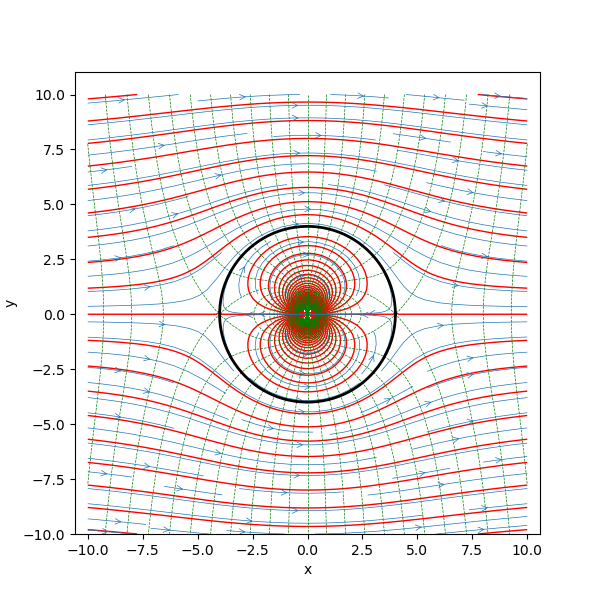

In [24]:
plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.contour(mesh.X, mesh.Y, psi, levels=np.arange(-40,40,1),linewidths=1,linestyles='-',colors='r')
plt.contour(mesh.X, mesh.Y, phi, levels=np.arange(-40,40,1),linewidths=0.5,linestyles='--',colors='g')

plt.streamplot(mesh.X, mesh.Y, U.u, U.v, density=1, linewidth=0.5, arrowsize=1, arrowstyle='->')

plt.plot(x_cylinder, y_cylinder, color='k', linestyle='-', linewidth=2)

#plt.colorbar()
plt.show()

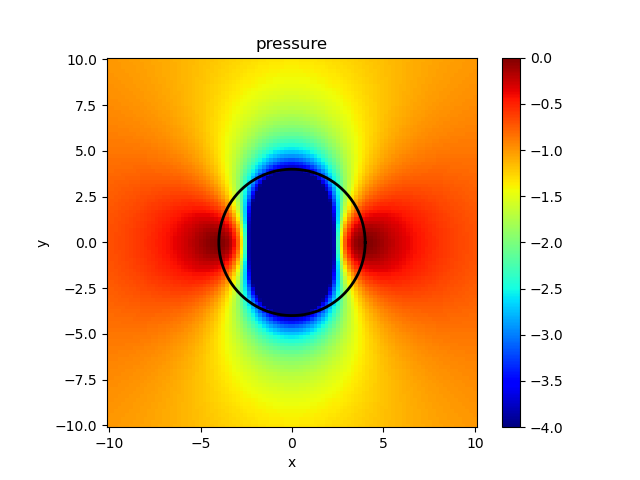

In [25]:
U.comp_p(0)
fig,ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
aa=ax.pcolor(mesh.X, mesh.Y, U.p,vmax=0,vmin=-4,cmap='jet')

fig.colorbar(aa,ax=ax)

ax.set_aspect('equal','box')
plt.title('pressure')

plt.plot(x_cylinder, y_cylinder, color='k', linestyle='-', linewidth=2)

plt.show()

In [26]:
R

4.0